# Bozza Random forest (gigi)

In [46]:
import pandas as pd
import os


heade = ['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'esca_v', 'Mcluster', 'gen']

path_data = '/home/gabriele/data/'
dyn = '/Dyn/' # Direi che così è facilmente customizzabile per come ogni autistic* si è sistemato i files.
cols = [1,2,3,4,9,13,15,16,17,25,27]
#print(len(cols), len(heade))


In [47]:
os.listdir(path_data + os.listdir(path_data)[0] + dyn)

['0.012',
 '0.0004',
 '0.0002',
 '0.006',
 '0.002',
 '0.0008',
 '0.008',
 '0.0016',
 '0.02',
 '0.016',
 '0.004',
 '0.0012']

In [48]:
def extractor(path_data, cluster):
    data = pd.DataFrame()
    wichcluster = os.listdir(path_data)
    #print(wichcluster)
    if cluster == 'gc':
        cluster = wichcluster[2]
    if cluster == 'nsc':
        cluster = wichcluster[1]
    if cluster == 'ysc':
        cluster = wichcluster[0]
    for i in os.listdir(path_data + cluster + dyn):
        #print(i)
        name = path_data + cluster + dyn + str(i) + '/nth_generation.txt'
        #print(name)
        dataZ = pd.read_csv(name, delimiter=' ', skiprows=1, usecols=cols, names=heade)#, names=heade)
        #dataZ.drop(dataZ.columns[[0, 5, 6, 7, 8, 10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 24, 26]], axis=1, inplace=True)
        #dataZ.columns = heade
        dataZ['Z'] = float(i)
        data = pd.concat([data, dataZ])
    return data

In [49]:
dgc = extractor(path_data, 'gc')

In [50]:
df = dgc.sample(frac=0.9)
print(df.dtypes)

M1           float64
M2           float64
S1           float64
S2           float64
t_pair       float64
t_elapsed    float64
Mrem         float64
Srem         float64
esca_v       float64
Mcluster     float64
gen            int64
Z            float64
dtype: object


## PCA (gigi)

In [51]:
def normer_col(df,i):
    media = df[i].mean()
    std = df[i].std()
    coso = (df[i] - media)/std
    return coso

0.8359703743896061


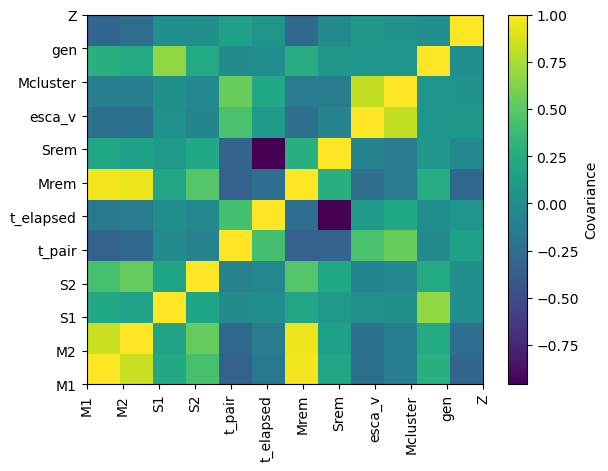

In [52]:
import matplotlib.pyplot as plt
import numpy as np

heade = list(df.columns)
matrix = np.zeros((len(heade), len(heade)))
for i in heade:
    a = heade.index(i)
    inorm = normer_col(df,i)
    for j in heade:
        #if i !=j:
        b = heade.index(j)
        jnorm = normer_col(df,j)
        #print(i,j)            
        c = np.cov(inorm, jnorm)[0,1]
        if i=='M1' and j =='M2':
            print(c)
        #print(np.cov(inorm, jnorm)[0,1])
        matrix[b,a] = c
x, y = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
x = x.flatten()
y = y.flatten()
values = matrix.flatten()
#ticks = np.linspace(-0.5,11.5,3)
# Create a 2D histogram
plt.hist2d(x,y, weights=values, bins=(matrix.shape[1], matrix.shape[0]), cmap='viridis')
plt.colorbar(label='Covariance')
plt.xticks(ticks=np.arange(len(heade)), labels=heade, rotation=90)  # Tick for each bin, labeled with `heade`
plt.yticks(ticks=np.arange(len(heade)), labels=heade)
#plt.ylabel(heade.index())
plt.show()

# Random Forest Classifier (io)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def explore_parameter_space(df):
    features = ['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed', 'Mrem', 'Srem', 'Mcluster', 'Z', 'esca_v']
    target = 'gen'
    
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {
        'n_estimators': [50, 100, 200],  # n trees
        'max_depth': [None, 10, 20, 30],  # tree depth
        'min_samples_split': [2, 5, 10],  # min samples to split
        'min_samples_leaf': [1, 2, 4]  # min samples in a leaf
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=5,  # n-fold cv
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    print("Best Negative MSE Score:", grid_search.best_score_)
    
    best_rf = grid_search.best_estimator_
    
    return best_rf, grid_search.best_params_

best_model, best_params = explore_parameter_space(df)

NameError: name 'df' is not defined